## UMAP for Exploring multiclass classification data

To use UMAP for exploring multiclass classification data, you apply it to reduce the data's dimensionality and then visualize the results in a 2D or 3D scatter plot. UMAP is particularly effective because it preserves both the local and global structure of your data, giving you a comprehensive view of how different classes cluster together. 


### Step 1: Install and import libraries

First, you'll need the umap-learn library. You will also use scikit-learn for data preprocessing and matplotlib for plotting. 

In [1]:
import umap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler


/home/daniel/projects/git/organizations/data-science-adventure/huggingface-tutorial/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Step 2: Load and preprocess your data
Use a standard multiclass dataset for this example, such as the digits dataset from scikit-learn. For UMAP to perform optimally, it's a good practice to scale your data first. 

In [2]:
# Load a sample multiclass dataset
digits = load_digits()
data = digits.data
target = digits.target

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


### Step 3: Apply UMAP for dimensionality reduction

Create and fit a UMAP reducer to your preprocessed data. By default, UMAP will reduce the data to two dimensions, which is perfect for visualization. 

In [3]:
# Create a UMAP reducer object
reducer = umap.UMAP(random_state=42) # Set random_state for reproducibility

# Fit and transform the data to get the 2D embedding
embedding = reducer.fit_transform(scaled_data)


/home/daniel/projects/git/organizations/data-science-adventure/huggingface-tutorial/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


### Step 4: Visualize the results

Create a scatter plot of the 2D embedding, coloring each point by its corresponding class from the original dataset's target variable. 

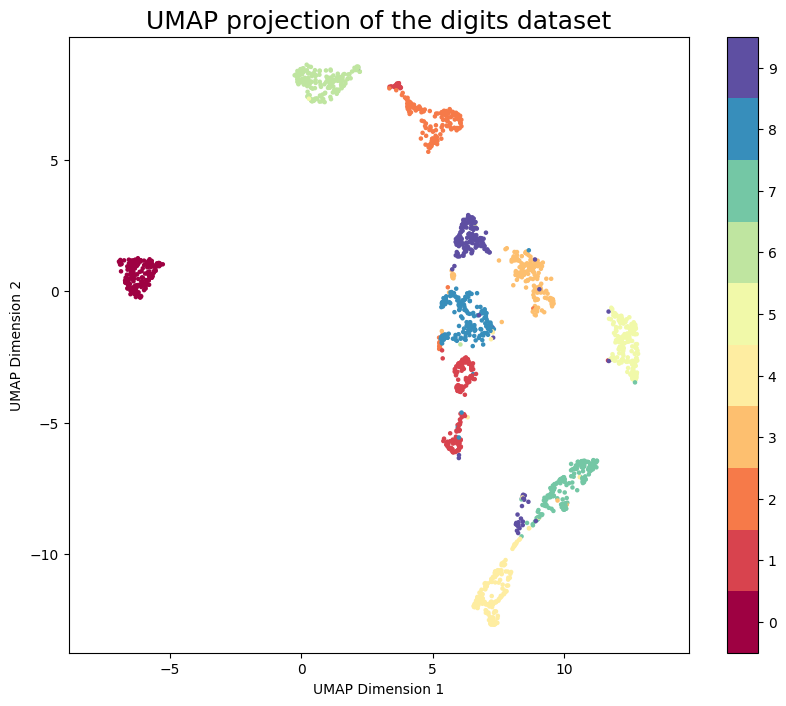

In [4]:
plt.figure(figsize=(10, 8))
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=target,
    cmap='Spectral', # The 'Spectral' colormap works well for multiclass visualization
    s=5 # Set point size
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the digits dataset', fontsize=18)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.show()


### Step 5: Interpret the plot

By visualizing the classes in a lower-dimensional space, you can gain several insights:

- **Separation**: You can visually assess how well-separated the different classes are. Well-defined, non-overlapping clusters indicate that the classifier will likely be very accurate.

- **Class similarity**: UMAP places similar data points closer together. The proximity of different class clusters can indicate which classes are most easily confused by a classifier. For example, if the clusters for "6" and "8" are close together, the model may have a harder time distinguishing between them.

- **Data anomalies**: Outliers or points from one class that appear inside another's cluster may represent mislabeled data or particularly difficult-to-classify samples.

- **Substructures**: You can often see internal structures within a single class, which can reveal subclasses or variations within the data that are not captured by the labels. 

### Step 6: Tune hyperparameters for different views

UMAP has key hyperparameters that control how it balances preserving local versus global structure. Adjusting these can change your view of the data. 

`n_neighbors`: Controls the balance between local and global structure.
- **Low** `n_neighbors`: Puts more emphasis on local structure, resulting in tighter, more defined clusters.
- **High** `n_neighbors`: Prioritizes global structure, which can merge clusters and show the overall, macro-level organization of the data.
  
`min_dist`: Controls how tightly points are packed together in the final visualization.
- **Low** `min_dist`: Creates more tightly clustered embeddings.
- **High** `min_dist`: Leads to a more loose and spread-out arrangement of points. 

## Example with different hyperparameters

/home/daniel/projects/git/organizations/data-science-adventure/huggingface-tutorial/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/daniel/projects/git/organizations/data-science-adventure/huggingface-tutorial/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


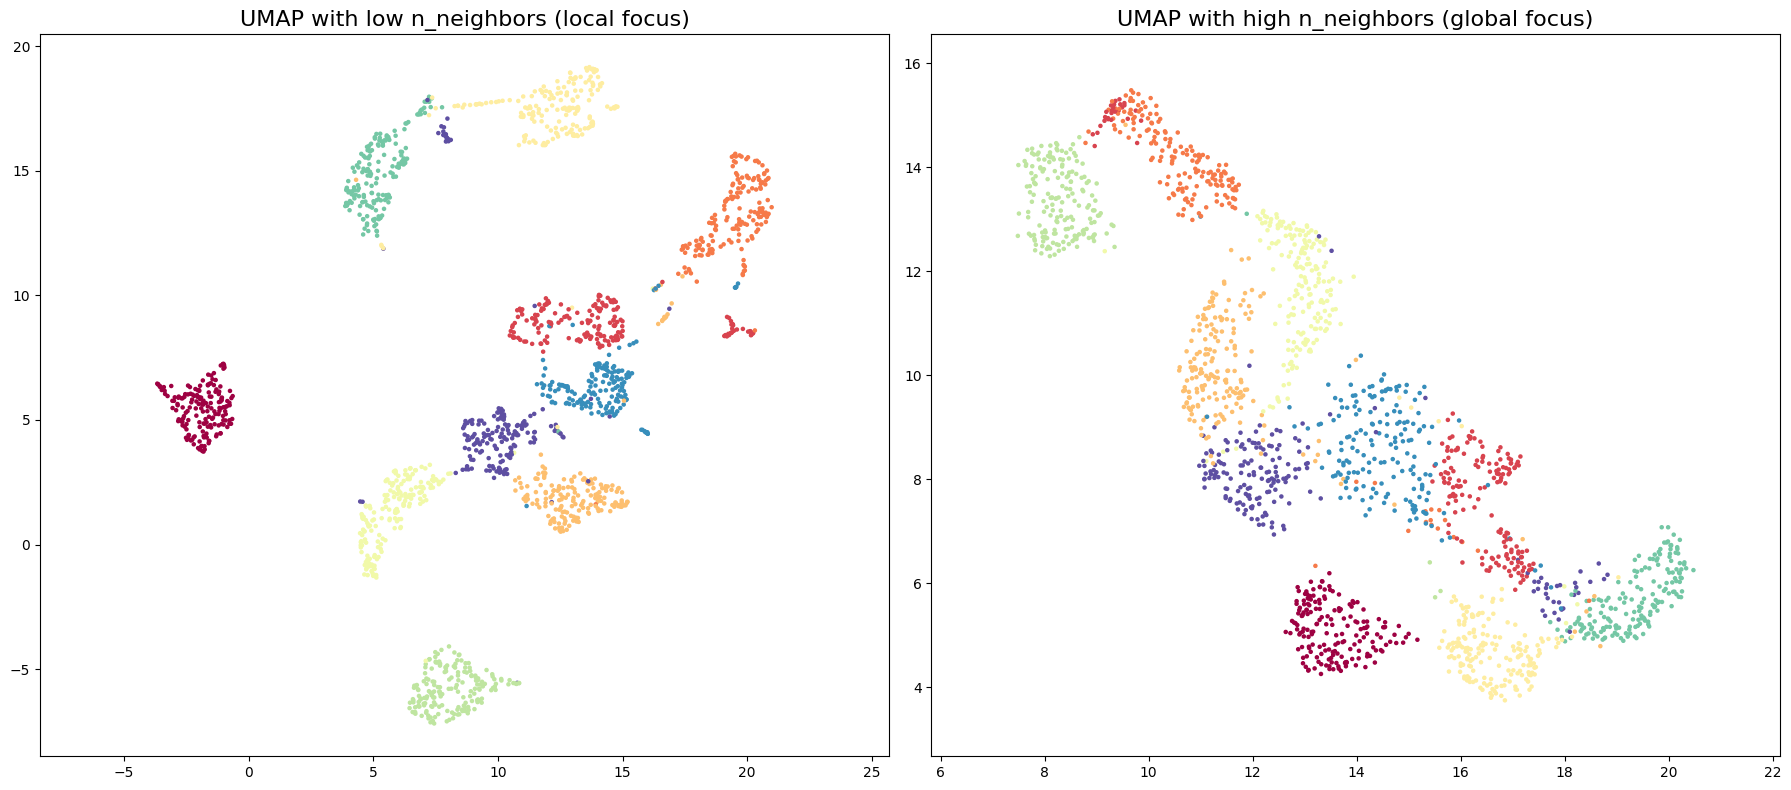

In [5]:
# Low n_neighbors for local structure
reducer_local = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=42)
embedding_local = reducer_local.fit_transform(scaled_data)

# High n_neighbors for global structure
reducer_global = umap.UMAP(n_neighbors=50, min_dist=0.3, random_state=42)
embedding_global = reducer_global.fit_transform(scaled_data)

# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Local focus plot
axes[0].scatter(embedding_local[:, 0], embedding_local[:, 1], c=target, cmap='Spectral', s=5)
axes[0].set_title('UMAP with low n_neighbors (local focus)', fontsize=16)
axes[0].set_aspect('equal', 'datalim')

# Global focus plot
axes[1].scatter(embedding_global[:, 0], embedding_global[:, 1], c=target, cmap='Spectral', s=5)
axes[1].set_title('UMAP with high n_neighbors (global focus)', fontsize=16)
axes[1].set_aspect('equal', 'datalim')

plt.tight_layout()
plt.show()
